# Create Mask for ECCO Modeling Utilities (EMU)
This notebook describes how to create a mask for EMU.

## Load modules 

In [1]:
import sys
from os.path import join,expanduser
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco
#sys.path.append(join(user_home_dir,'ECCO-v4-Python-Tutorial'))
#import ecco_access as ea

In [2]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================

ECCO_dir = join('/efs_ecco','ECCO_V4r4_PODAAC')

## Load grid

In [3]:
# Load grid 
ShortNames_list = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4"]
#ecco_grid = xr.open_dataset(ShortNames_list[0])
ecco_grid = xr.open_dataset('/efs_ecco/ECCO/V4/r4/ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
ecco_grid.load()

<xarray.Dataset> Size: 89MB
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
              k_p1: 51, tile: 13, nb: 4, nv: 2)
Coordinates: (12/20)
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...       ...
    Zp1      (k_p1) float32 204B 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
    Zu       (k_u) float32 200B -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
    Zl       (k_l) float32 200B 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
    XC_bnds  (tile, j, i, nb) float32 2MB -115.0 -115.0 -107.9 ... -115.0 -108.5
    YC_bnds  (tile, j, i, nb) float32 2MB -88.18 -88.32 -88.3 ... -88.18 -88.16
    Z_bnds   (k, nv) float32 400B 0.0 -10.0 -10.0 ... -5.678e+03 -6.134e+03
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    SN       (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    rA       (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    dxG      (tile, j_g, i) float32 421kB 1.558e+04 1.559e+04 ... 2.314e+04
    dyG      (tile, j, i_g) float32 421kB 2.321e+04 2.327e+04 ... 1.558e+04
    Depth    (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    hFacC    (k, tile, j, i) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacW    (k, tile, j, i_g) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacS    (k, tile, j_g, i) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maskC    (k, tile, j, i) bool 5MB False False False ... False False False
    maskW    (k, tile, j, i_g) bool 5MB False False False ... False False False
    maskS    (k, tile, j_g, i) bool 5MB False False False ... False False False
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

### Save some fields to numpy arraies 

In [4]:
# Get the model grid longitude and latitude
XC = ecco_grid.XC.values # modle grid longitude (13x90x90) 
YC = ecco_grid.YC.values # latitudes
# Also grid cell areaa in (m^2)
rA = ecco_grid.rA.values
maskC = ecco_grid.maskC.values # 3d mask (0/1) for model grid (tracer point)
maskCSurf = maskC[0] # maskC for surface (level = 1 )
hFacC = ecco_grid.hFacC.values # 3d non-dim factors (0-1) reflecting model cell geometry in vertical direction. Partial cells have values >0 but <1.
Zl = ecco_grid.Zl.values # depth of vertical cell face: between 0 and -5678 meters
Z  = ecco_grid.Z.values # depth of vertical cell ceter: between -10 and -5906 meters
drF = ecco_grid.drF.values # layer thickness (m); 1d with 50 elements

## Example 1: Create a 2d mask for the box-mean SSH in the NINO 3.4 box, weighted by grid cell area

### Specify latitude and longitude ranges

In [5]:
# Example: Create a 2d mask for the box-mean SSH in the NINO 3.4 box, weighted by grid cell area
# Specify latitude and longitude ranges
lat1 = -5
lat2 = 5
lon1 = -170
lon2 = -120

### Create a temporary mask that contains 0 for points outside the box and 1 for points inside.

In [6]:
tmp_msk = (XC>=lon1) & (XC<lon2) & (YC>=lat1) & (YC<lat2)

### Calculate mask for EMU 

In [7]:
# Apply grid cell area weight
# First calculate the total area of wet points in the box, 
# where rA is grid cell area, tmp_msk defines the 0/1 mask for the box, and maskCSurf defines wet/dry points.
area_sum = np.sum(rA*tmp_msk*maskCSurf)
# The area weighted mask is just 
mask = rA*tmp_msk*maskCSurf/area_sum

### Plot to check by using ECCOv4-py plot_tiles
For plotting purposes, we set land points to NaN so that they appear as white regions.

(<Figure size 900x789 with 17 Axes>,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]]))

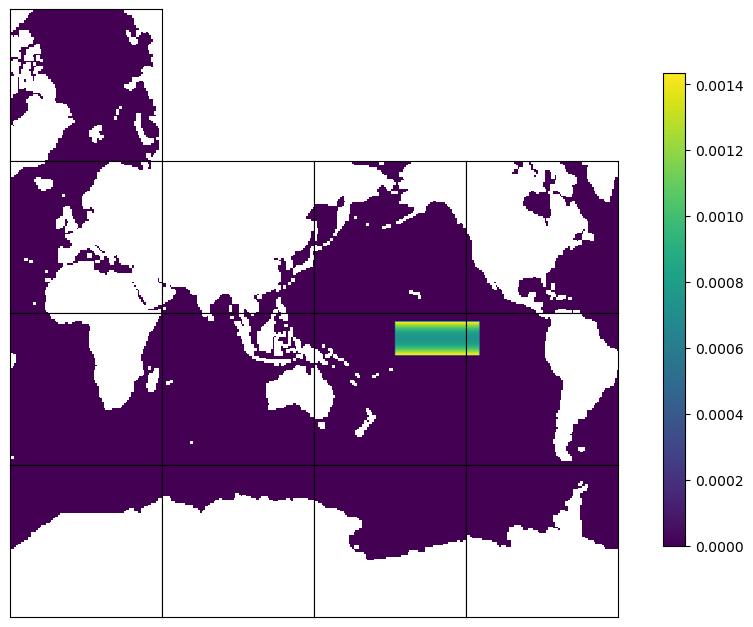

In [8]:
mask_tmpplot = np.copy(mask)
mask_tmpplot[maskCSurf==False] = np.nan
ecco.plot_tiles(mask_tmpplot, rotate_to_latlon=True, layout='latlon', show_tile_labels=False, show_colorbar=True, less_output=True)

### Check the sum of mask and a point outside the NINO 3.4 box
In this case, the sum of the mask should be equal to 1. The mask outside the box is zero. 

In [9]:
print(f'mask at 1,45,50 (tile, j, i): {mask[1,45,45]}')
print(f'Sum of mask: {np.sum(mask)}')

mask at 1,45,50 (tile, j, i): 0.0
Sum of mask: 1.0


### Write mask to a file for EMU to use

In [10]:
# Write out the mask to a file to be used by EMU
# First convert the 13x90x90 to a compact formt 1170x90, which is the format that EMU expects for input files.
mask_c = ecco.llc_tiles_to_compact(mask, less_output=True)

# Assume you have an output directory (repalce USERNAME with your own username). If not, create one. 
# output_dir = '/efs_ecco/USERNAME/mask'
output_dir = '/efs_ecco/owang/EMU/mask'
mask_fn = f'mask2d_{lon1:.1f}_{lon2:.1f}_{lat1:.1f}_{lat2:.1f}.bin'

# Output the mask
mask_c.astype('>f4').tofile(output_dir+'/'+mask_fn)

## Example 2: Create a very similar mask but for ***SSH anomlay relative to the global mean sea level***
This mask is the same as the previous example, except that SSH now is anomlay relative to the global mean sea level. So, we are going to create the mask for the box-mean ***SSH anomaly***, relative to the global mean sea level, in the NINO 3.4 box, weighted by grid cell area. We will use many variables that were computed in the previous example.

### Create mask

In [11]:
# global surface ocean area 
gso_area_sum = np.sum(rA*maskCSurf)

# Note the second term on LHS, which is needed to remove the global mean sea level.
mask_ano = rA*tmp_msk*maskCSurf/area_sum - rA*maskCSurf/gso_area_sum

### Plot the mask
There are non-zero values outside the NINO 3.4 box. For plotting purposes, we again set land points to NaN so they appear as white regions.

(<Figure size 900x789 with 17 Axes>,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]]))

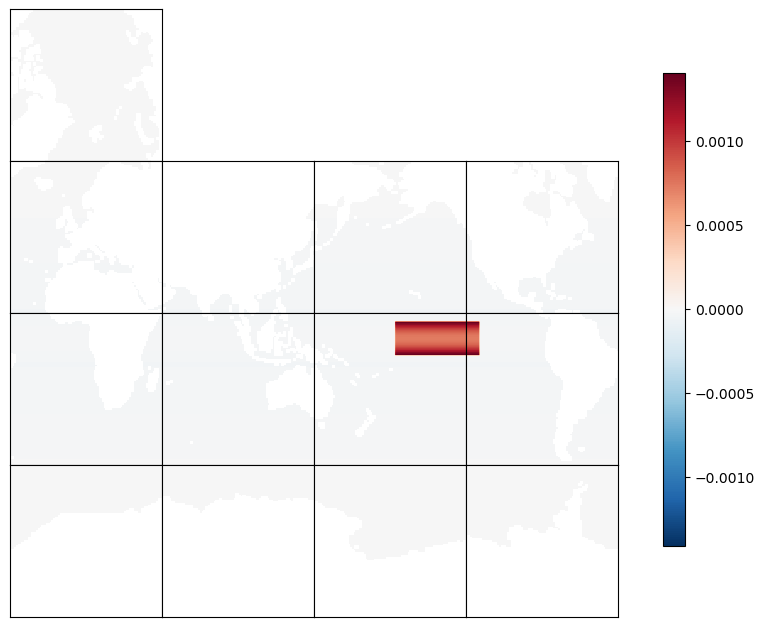

In [12]:
# Plot mask to check by using ECCOv4-py plot_tiles
mask_tmpplot_ano = np.copy(mask_ano)
mask_tmpplot_ano[maskCSurf==False] = np.nan
ecco.plot_tiles(mask_tmpplot_ano, rotate_to_latlon=True, layout='latlon', show_tile_labels=False, show_colorbar=True, less_output=True)

### Check the mask for a point outside of the NINO 3.4 box
The mask outside the box is not zero but contains small values reflecting the local SSH contribution to the global mean sea level.

In [13]:
print(f'mask at 1,45,50 (tile, j, i): {mask_ano[1,45,45]:.2e}')

mask at 1,45,50 (tile, j, i): -2.90e-05


### Write mask to a file for EMU to use

In [14]:
# Write out the mask to a file to be used by EMU
# First convert the 13x90x90 to a compact formt 1170x90, which is the format that EMU expects for input files.
mask_ano_c = ecco.llc_tiles_to_compact(mask_ano, less_output=True)

mask_ano_fn = f'mask2d_regional_ano_{lon1:.1f}_{lon2:.1f}_{lat1:.1f}_{lat2:.1f}.bin'

# Output the mask
mask_ano_c.astype('>f4').tofile(output_dir+'/'+mask_ano_fn)

## Example 3: Create a 3D mask for the box-mean THETA in the NINO 3.4 box between 20 and 60 meters, weighted by grid cell volume

### Depth range 
The longitude and latitude ranges are the same as Examples 1 and 2.

In [15]:
# Depth range in meters. Note that z1 is for the deeper layer and z2 is for the shallower layer, i.e., z1>=z2.
z1 = 60
z2 = 10

### Create a temporary 3d mask that contains 0 for points outside the box and 1 for points inside.

In [16]:
# We will use the 2d 0/1 mask for the NINO 3.4 box. First populate a 3d array with the 2d mask.
tmp_msk3d = np.tile(tmp_msk, (len(drF), 1, 1, 1))
# Vertical range
idxz = (np.abs(Zl)<z1) & (np.abs(Zl)>=z2) 
# mask out vertical levels outside the vertical range
tmp_msk3d[~idxz,:] = 0.

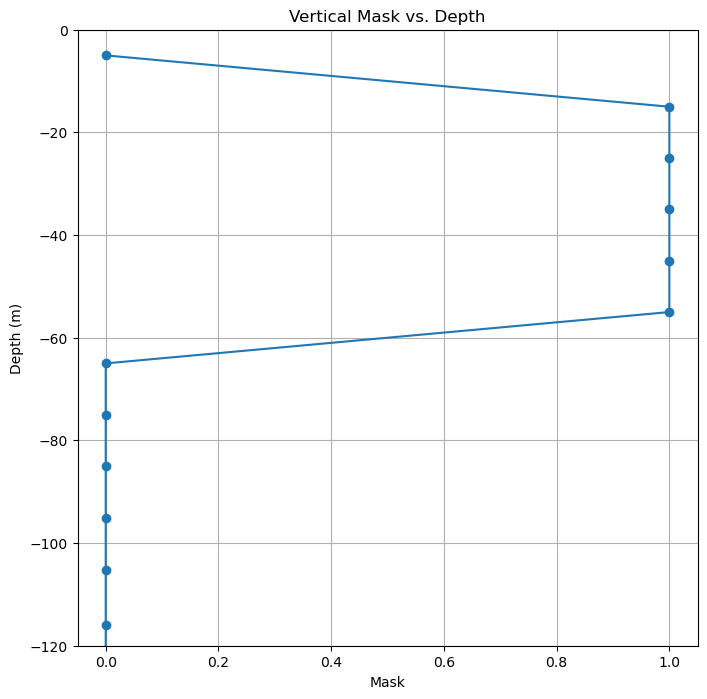

In [17]:
# Plot the vertical mask to check
plt.figure(figsize=(8,8))
plt.plot(idxz, Z, '-o')
plt.title('Vertical Mask vs. Depth')
plt.xlabel('Mask')
plt.ylabel('Depth (m)') 
plt.ylim(-z1*2, 0)
plt.grid()
plt.show()

### Calculate 3d mask

In [18]:
# Apply grid cell volume weight
# Create a 3d array for grid cell volume
vol3d = rA*hFacC*np.expand_dims(drF,axis=(1,2,3)) # product of horizontal area, layer thickness, and layer thickness geometry 
# Calculate the total volume of wet points in the box.
vol3d_boxsum = np.sum(vol3d*tmp_msk3d)
# Volume weighted mask for the block is just 
mask3d = vol3d*tmp_msk3d/vol3d_boxsum

### Plot the mask

Text(0.5, 0.98, '3d mask for level 3')

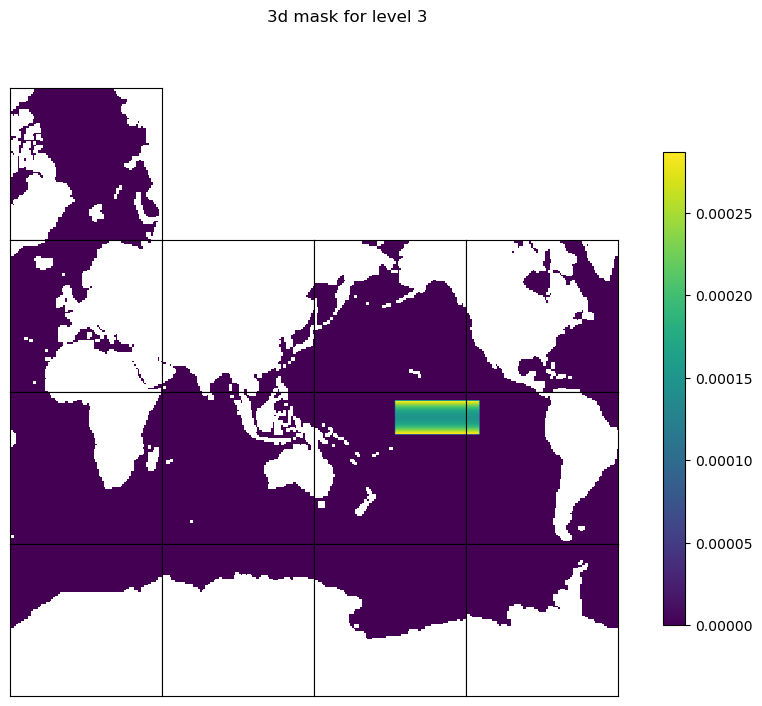

In [19]:
# Plot mask to check by using ECCOv4-py plot_tiles
# Create a temporary mask for plotting and set land points to NaN
mask_tmpplot3d = np.copy(mask3d)
mask_tmpplot3d[maskC==False] = np.nan
# layer 3 
level = 3
fig=ecco.plot_tiles(mask_tmpplot3d[level-1], rotate_to_latlon=True, layout='latlon', show_tile_labels=False, show_colorbar=True, less_output=True)
fig[0].suptitle(f'3d mask for level {level}')

Text(0.5, 0.98, '3d mask for level 8')

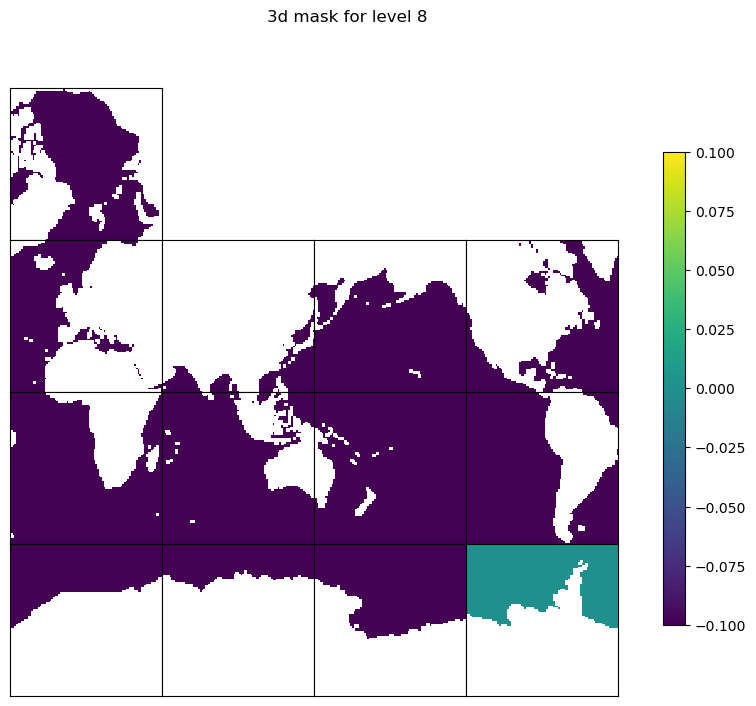

In [20]:
# Plot the mask for a level outside the vertical range: level 8
level = 8
fig=ecco.plot_tiles(mask_tmpplot3d[level-1], rotate_to_latlon=True, layout='latlon', show_tile_labels=False, show_colorbar=True, less_output=True)
fig[0].suptitle(f'3d mask for level {level}')

### Write the 3d mask to a file for EMU to use

In [21]:
# Write out the mask to a file to be used by EMU
# First convert the 13x90x90 tile format to the compact formt 1170x90, which is the format that EMU expects for input files.
mask3d_c = ecco.llc_tiles_to_compact(mask3d, less_output=True)

# Specify output file name
mask3d_fn = f'mask3d_{lon1:.1f}_{lon2:.1f}_{lat1:.1f}_{lat2:.1f}_{z1:.1f}_{z2:.1f}.bin'

# Output the mask
mask3d_c.astype('>f4').tofile(output_dir+'/'+mask3d_fn)

llc_faces_to_compact: data_compact array shape (50, 1170, 90)
